# Práctica 0

### Algoritmo de integración numérica basado en el método de Monte Carlo.

In [1]:
import time
import numpy as np
from scipy import integrate
import random
import matplotlib.pyplot as plt

In [2]:
def integra_mc_loop(fun, a, b, num_puntos=10000):
    """Hallar max_f (máximo de la función fun en el intervalo (a,b) ),
        Rectángulo de lados (b-a) y M
        Generar num_puntos puntos aleatorios coordenadas x (a,b) e y (0,M)
        Contar el número de puntos que se quedan por debajo
        Fórmula: I= N_debajo/N_total (b-a)M
    """
    eje_x = np.linspace(a, b, num_puntos)
    num_debajo = 0
    eje_y = fun(eje_x)
    max_f = max(eje_y)
    min_f = min(eje_y)
 
    for i in range(num_puntos):
        x = random.uniform(a, b)
        y = random.uniform(min_f, max_f)
        # plt.plot(x, y, 'o')
    
        if fun(x) > y:
            num_debajo = num_debajo + 1

        # plt.plot(eje_x, eje_y)
    
    return (num_debajo/num_puntos)*(b-a)*max_f
          

In [3]:
f = lambda x: np.sin(x)
a = 0.0
b = np.pi
print("Nuestra función por bucles: {} ".format(integra_mc_loop(f, a, b, 100)))
print("scipy función: {} ".format(integrate.quad(f, a, b)))

Nuestra función por bucles: 2.010366216969439 
scipy función: (2.0, 2.220446049250313e-14) 


In [4]:
def integra_mc_vector(fun, a, b, num_puntos=10000):
    """Hallar max_f (máximo de la función fun en el intervalo (a,b) ),
        Rectángulo de lados (b-a) y M
        Generar num_puntos puntos aleatorios coordenadas x (a,b) e y (0,M)
        Contar el número de puntos que se quedan por debajo
        Fórmula: I= N_debajo/N_total (b-a)M
    """
    eje_x = np.linspace(a, b, num_puntos)
    num_debajo = 0
    eje_y = fun(eje_x)
    max_f = max(eje_y)
    min_f = min(eje_y)
    x = np.random.uniform(a, b, num_puntos) 
    y = np.random.uniform(min_f, max_f, num_puntos)
    # plt.plot(x, y, 'o')
            
    num_debajo = np.sum(fun(x) > y)
   
    # plt.plot(eje_x, eje_y)
    
    return (num_debajo/num_puntos)*(b-a)*max_f

In [5]:
print("Nuestra función vectorizada: {} ".format(integra_mc_vector(f, a, b, 100)))
print("scipy función: {} ".format(integrate.quad(f, a, b)))

Nuestra función vectorizada: 2.0417781891095865 
scipy función: (2.0, 2.220446049250313e-14) 


In [6]:
def compara_tiempos(fun, a, b):
    sizes = np.linspace(100, 1000000, 10)
    times_loop = []
    times_vector = []
    for size in sizes:
        tic = time.process_time()
        loop = integra_mc_loop(fun, a, b, int(size))
        toc = time.process_time()
        times_loop += [1000 * (toc - tic)]
        tic = time.process_time()
        vector = integra_mc_vector(fun, a, b, int(size))
        toc = time.process_time()
        times_vector += [1000 * (toc - tic)]
    plt.figure()
    plt.scatter(sizes, times_loop, c='red', label='bucle')
    plt.scatter(sizes, times_vector, c='blue', label='vector')
    plt.legend()
    plt.savefig('compara tiempos integra.png')

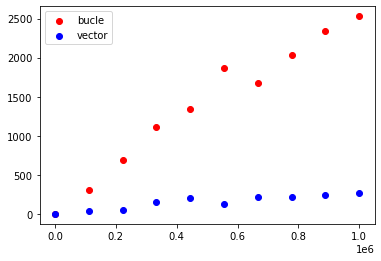

In [8]:
compara_tiempos(np.sin,0.0,np.pi)